# <div align="center">CP322-A Mini-Project 1: Machine Learning</div>
## <div align="center">Group 6</div>
### <div align="center">due on 15-Oct-2023 at 11:30 PM</div>

Imports:

In [1]:
import numpy as np
import heapq
from math import sqrt
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import statistics

from PythonFiles.Functions import readFileKNN, readFile, readFileLog, bestKValue, dataAnalysis

from PythonFiles.Models import LogisticRegression, kNN

## Task 1: Acquire, preprocess, and analyze the data

1. Load the datasets into NumPy objects (i.e., arrays or matrices) in Python. Remember to convert the wine dataset
to a binary task, as discussed above.
2. Clean the data. Are there any missing or malformed features? Are there other data oddities that need to be
dealt with? You should remove any examples with missing or malformed features and note this in your
report. For categorical variables, you can use a one-hot encoding.
3. Compute basic statistics on the data to understand it better. E.g., what are the distributions of the positive vs.
negative classes, what are the distributions of some of the numerical features? what are the correlations between
the features? how do the scatter plots of pair-wise features look like for some subset of features?

In [2]:
def readFileNP(filename):
    
    data = []
    labels = []
    with open(filename, "r") as file:
        for line in file:
            line = line.strip()
            if line:  # Skip empty lines
                row = line.split(",")
                if filename=="data/iris.data":
                    data.append([float(val) for val in row[:-1]])
                    labels.append(row[-1])
                else:
                    data.append(row)

    data = np.array(data)
    if filename == "data/iris.data":
        return np.array(data),np.array(labels)
    else:
        return data

def readFile(filename):
    data = []
    labels = []
    with open(filename, "r") as file:
        for line in file:
            line = line.strip()
            if line:  # Skip empty lines
                row = line.split(",")
                if filename == "adult.data":
                    # Convert non-numerical features to float
                    age = float(row[0])
                    fnlwgt = float(row[2])
                    education_num = float(row[4])
                    capital_gain = float(row[10])
                    capital_loss = float(row[11])
                    hours_per_week = float(row[12])
                    # Combine the numerical features
                    numerical_features = [age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week]
                    # Append the numerical features
                    data.append(numerical_features)
                    label = row[-1]
                    # Map the labels to binary values, e.g., '<=50K' to 0 and '>50K' to 1
                    labels.append(0 if label == ' <=50K' else 1)
                elif filename == "Rice_Cammeo_Osmancik.arff.txt":
                    data.append([float(val) for val in row[:-1]])
                    label = row[-1]
                    labels.append(0 if label == 'Cammeo' else 1)
                elif filename == "agaricus-lepiota.data":
                    label = row[0]
                    labels.append(0 if label == 'e' else 1)
                    if "?" not in row:
                        data.append([val for val in row[:-1]])  
                        
                else:
                    data.append([float(val) for val in row[:-1]])
                    label = row[-1]
                    labels.append(0 if label == 'b' else 1)


    return data, labels
    
class dataAnalysis:
    def __init__(self, data, categories, classifications):
        self.data = data
        self.size = len(data)
        self.categories = categories
        self.classifications = classifications
    def printLabelStats(self):
        '''
        ===================================================================================
        DESCRIPTION: 
        ===================================================================================
        Print statistics on every classification in data
        ===================================================================================
        '''
        print("=====================================================")
        print("Classification Analysis:")
        print("=====================================================")
        print(f"Total: {self.size} (%100)")
        
        for label in self.classifications:
            count = len(self.data[self.data[:, -1] == label])
            percentage = round(100*count/self.size,2)
            print(f"Value: {label}, Count: {count}, Percentage: %{percentage}")
            
    def printCategoryStats(self):
        '''
        ===================================================================================
        DESCRIPTION: 
        ===================================================================================
        Print statistics on every attribute in data
        ===================================================================================
        '''
        data = self.data
        categories = self.categories
        size = self.size
        labels = column = data[:, -1]
        print("=====================================================")
        print("Attribute Analysis:")
        print("=====================================================")
        for i in range(len(categories)):
            category = categories[i]
            column = data[:, i].astype(float)
            
            avg = np.mean(column)
            med = np.median(column)
            mode = float(stats.mode(column,keepdims=True)[0][0])
            std_dev = np.std(column)
        
            unique_values, counts = np.unique(column, return_counts=True)
            
            print("-----------------------------------------------------")
            print(f"{category.upper()} Analysis:")
            print("-----------------------------------------------------")
            for value, count in zip(unique_values, counts):
                percentage = round(100*count/self.size,2)
                print(f"Value: {value}, Count: {count}, Percentage: %{percentage}")
                
            print(f"\nMean: {avg}")
            print(f"Median: {med}")
            print(f"Mode: {mode}")
            print(f"Standard Deviation: {std_dev}")
            
            plt.figure(figsize=(4, 4))
            plt.bar(labels, column, edgecolor='black')
            plt.xlabel(category)
            plt.ylabel("Output")
            plt.title("Bar Chart of Numeric Data by Labels")
            plt.show()
           

            
            

### Dataset 1 (Ionosphere): 

Classification Analysis:
Total: 351 (%100)
Value: g, Count: 225, Percentage: %64.1
Value: b, Count: 126, Percentage: %35.9
Attribute Analysis:
-----------------------------------------------------
ATTRIBUTE 1 Analysis:
-----------------------------------------------------
Value: 0.0, Count: 38, Percentage: %10.83
Value: 1.0, Count: 313, Percentage: %89.17

Mean: 0.8917378917378918
Median: 1.0
Mode: 1.0
Standard Deviation: 0.31071115875802047


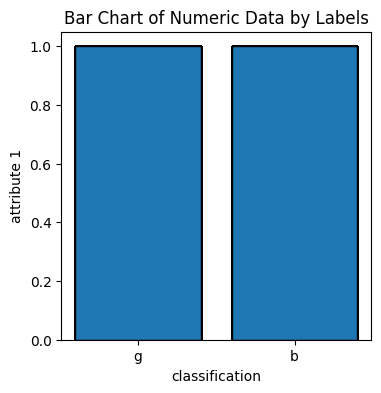

-----------------------------------------------------
ATTRIBUTE 2 Analysis:
-----------------------------------------------------
Value: 0.0, Count: 351, Percentage: %100.0

Mean: 0.0
Median: 0.0
Mode: 0.0
Standard Deviation: 0.0


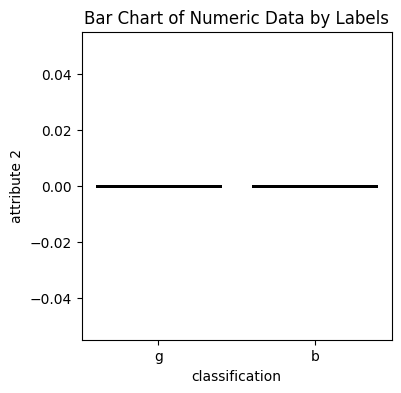

-----------------------------------------------------
ATTRIBUTE 3 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 15, Percentage: %4.27
Range: [-0.67935 - -0.47935], Count: 4, Percentage: %1.14
Range: [-0.26667 - -0.06667000000000001], Count: 2, Percentage: %0.57
Range: [-0.01864 - 0.18136000000000002], Count: 38, Percentage: %10.83
Range: [0.1859 - 0.3859], Count: 17, Percentage: %4.84
Range: [0.39179 - 0.59179], Count: 27, Percentage: %7.69
Range: [0.5984 - 0.7984], Count: 45, Percentage: %12.82
Range: [0.79847 - 0.99847], Count: 108, Percentage: %30.77
Range: [1.0 - 1.2], Count: 95, Percentage: %27.07

Mean: 0.6413418518518519
Median: 0.87111
Mode: 1.0
Standard Deviation: 0.49699871078010205


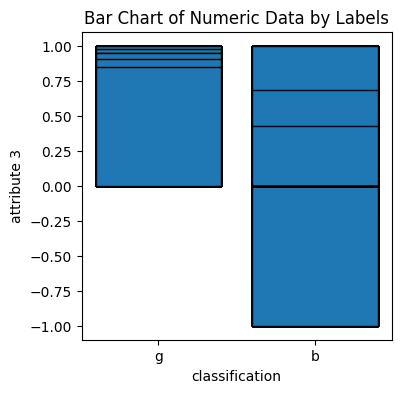

-----------------------------------------------------
ATTRIBUTE 4 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 27, Percentage: %7.69
Range: [-0.63636 - -0.43636], Count: 11, Percentage: %3.13
Range: [-0.41457 - -0.21456999999999998], Count: 12, Percentage: %3.42
Range: [-0.20685 - -0.006849999999999995], Count: 73, Percentage: %20.8
Range: [-0.00647 - 0.19353], Count: 140, Percentage: %39.89
Range: [0.19527 - 0.39527], Count: 40, Percentage: %11.4
Range: [0.4 - 0.6000000000000001], Count: 18, Percentage: %5.13
Range: [0.63548 - 0.83548], Count: 4, Percentage: %1.14
Range: [1.0 - 1.2], Count: 26, Percentage: %7.41

Mean: 0.04437188034188035
Median: 0.01631
Mode: 0.0
Standard Deviation: 0.44080550686951814


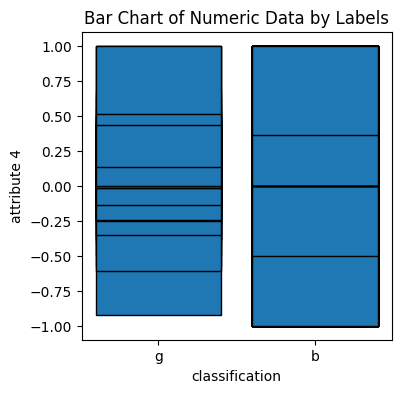

-----------------------------------------------------
ATTRIBUTE 5 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 16, Percentage: %4.56
Range: [-0.78824 - -0.5882400000000001], Count: 3, Percentage: %0.85
Range: [-0.50694 - -0.30693999999999994], Count: 4, Percentage: %1.14
Range: [-0.27303 - -0.07302999999999998], Count: 2, Percentage: %0.57
Range: [-0.04433 - 0.15567], Count: 48, Percentage: %13.68
Range: [0.1597 - 0.3597], Count: 10, Percentage: %2.85
Range: [0.367 - 0.567], Count: 23, Percentage: %6.55
Range: [0.58182 - 0.78182], Count: 58, Percentage: %16.52
Range: [0.79074 - 0.99074], Count: 85, Percentage: %24.22
Range: [0.9915 - 1.1915], Count: 102, Percentage: %29.06

Mean: 0.6010678917378918
Median: 0.8092
Mode: 1.0
Standard Deviation: 0.51912044174025


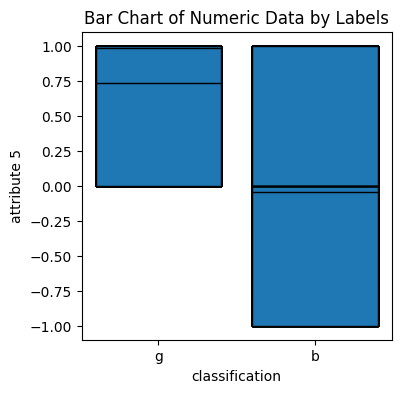

-----------------------------------------------------
ATTRIBUTE 6 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 24, Percentage: %6.84
Range: [-0.78509 - -0.5850899999999999], Count: 4, Percentage: %1.14
Range: [-0.45455 - -0.25455], Count: 4, Percentage: %1.14
Range: [-0.25346 - -0.05346000000000001], Count: 43, Percentage: %12.25
Range: [-0.05178 - 0.14822000000000002], Count: 150, Percentage: %42.74
Range: [0.15033 - 0.35033000000000003], Count: 40, Percentage: %11.4
Range: [0.35237 - 0.55237], Count: 24, Percentage: %6.84
Range: [0.55298 - 0.75298], Count: 23, Percentage: %6.55
Range: [0.75472 - 0.95472], Count: 13, Percentage: %3.7
Range: [1.0 - 1.2], Count: 26, Percentage: %7.41

Mean: 0.11588900284900285
Median: 0.0228
Mode: 0.0
Standard Deviation: 0.46015323610372066


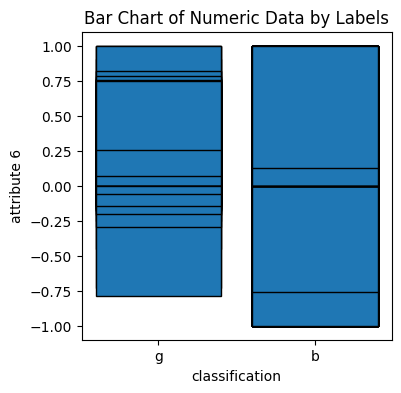

-----------------------------------------------------
ATTRIBUTE 7 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 13, Percentage: %3.7
Range: [-0.75693 - -0.5569299999999999], Count: 1, Percentage: %0.28
Range: [-0.39466 - -0.19466], Count: 5, Percentage: %1.42
Range: [-0.17778 - 0.022220000000000018], Count: 51, Percentage: %14.53
Range: [0.03759 - 0.23759000000000002], Count: 20, Percentage: %5.7
Range: [0.25 - 0.45], Count: 28, Percentage: %7.98
Range: [0.45217 - 0.65217], Count: 40, Percentage: %11.4
Range: [0.65829 - 0.85829], Count: 62, Percentage: %17.66
Range: [0.86098 - 1.06098], Count: 131, Percentage: %37.32

Mean: 0.5500950712250713
Median: 0.72873
Mode: 1.0
Standard Deviation: 0.49195148458124416


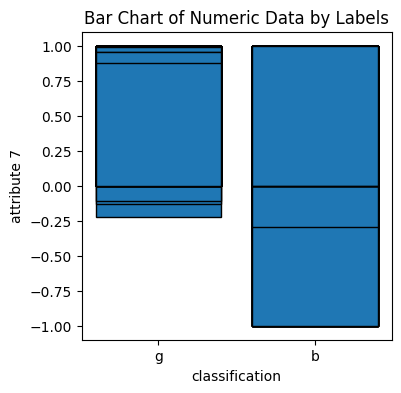

-----------------------------------------------------
ATTRIBUTE 8 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 31, Percentage: %8.83
Range: [-0.78502 - -0.5850200000000001], Count: 5, Percentage: %1.42
Range: [-0.58388 - -0.38387999999999994], Count: 5, Percentage: %1.42
Range: [-0.37708 - -0.17708000000000002], Count: 14, Percentage: %3.99
Range: [-0.17123 - 0.028770000000000018], Count: 135, Percentage: %38.46
Range: [0.03466 - 0.23466], Count: 48, Percentage: %13.68
Range: [0.23966 - 0.43966000000000005], Count: 25, Percentage: %7.12
Range: [0.45747 - 0.65747], Count: 20, Percentage: %5.7
Range: [0.67647 - 0.8764700000000001], Count: 25, Percentage: %7.12
Range: [0.87892 - 1.07892], Count: 43, Percentage: %12.25

Mean: 0.11936037037037038
Median: 0.01471
Mode: 0.0
Standard Deviation: 0.5200075576824547


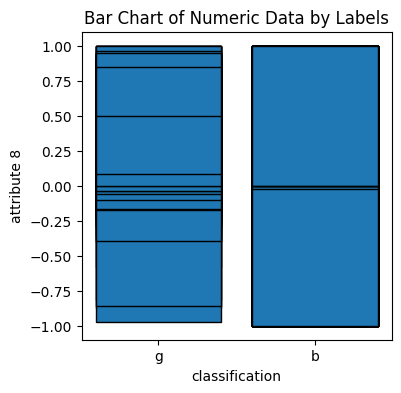

-----------------------------------------------------
ATTRIBUTE 9 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 13, Percentage: %3.7
Range: [-0.55941 - -0.35940999999999995], Count: 5, Percentage: %1.42
Range: [-0.33333 - -0.13333], Count: 14, Percentage: %3.99
Range: [-0.11108 - 0.08892000000000001], Count: 57, Percentage: %16.24
Range: [0.10991 - 0.30991], Count: 23, Percentage: %6.55
Range: [0.31889 - 0.5188900000000001], Count: 28, Percentage: %7.98
Range: [0.52632 - 0.7263200000000001], Count: 45, Percentage: %12.82
Range: [0.73196 - 0.9319600000000001], Count: 73, Percentage: %20.8
Range: [0.93582 - 1.13582], Count: 93, Percentage: %26.5

Mean: 0.5118480911680912
Median: 0.68421
Mode: 1.0
Standard Deviation: 0.506342696090129


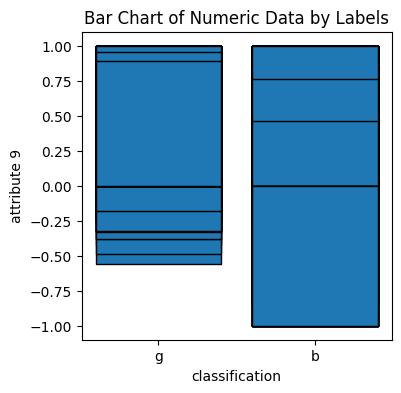

-----------------------------------------------------
ATTRIBUTE 10 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 17, Percentage: %4.84
Range: [-0.63427 - -0.43427], Count: 4, Percentage: %1.14
Range: [-0.43107 - -0.23107], Count: 16, Percentage: %4.56
Range: [-0.22222 - -0.02221999999999999], Count: 63, Percentage: %17.95
Range: [-0.02174 - 0.17826], Count: 124, Percentage: %35.33
Range: [0.18261 - 0.38261], Count: 28, Percentage: %7.98
Range: [0.41252 - 0.61252], Count: 17, Percentage: %4.84
Range: [0.63842 - 0.8384199999999999], Count: 25, Percentage: %7.12
Range: [0.84222 - 1.04222], Count: 57, Percentage: %16.24

Mean: 0.18134538461538463
Median: 0.01829
Mode: 0.0
Standard Deviation: 0.4831611503696893


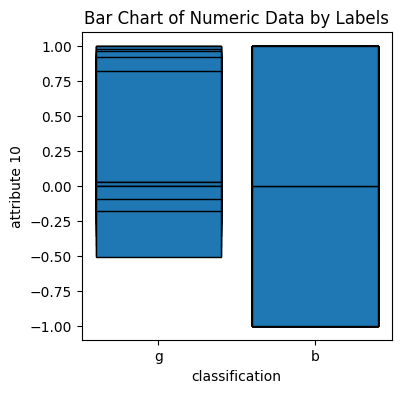

-----------------------------------------------------
ATTRIBUTE 11 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 16, Percentage: %4.56
Range: [-0.76229 - -0.56229], Count: 9, Percentage: %2.56
Range: [-0.55483 - -0.35483000000000003], Count: 11, Percentage: %3.13
Range: [-0.35148 - -0.15148], Count: 12, Percentage: %3.42
Range: [-0.13956 - 0.06044000000000002], Count: 46, Percentage: %13.11
Range: [0.06266 - 0.26266], Count: 13, Percentage: %3.7
Range: [0.26289 - 0.46289], Count: 28, Percentage: %7.98
Range: [0.47744 - 0.67744], Count: 42, Percentage: %11.97
Range: [0.67801 - 0.87801], Count: 46, Percentage: %13.11
Range: [0.88462 - 1.08462], Count: 128, Percentage: %36.47

Mean: 0.47618264957264955
Median: 0.66798
Mode: 1.0
Standard Deviation: 0.56269308800332


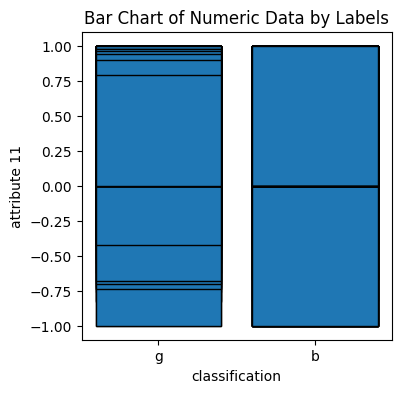

-----------------------------------------------------
ATTRIBUTE 12 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 20, Percentage: %5.7
Range: [-0.67743 - -0.47742999999999997], Count: 5, Percentage: %1.42
Range: [-0.43569 - -0.23569], Count: 24, Percentage: %6.84
Range: [-0.23518 - -0.03517999999999999], Count: 48, Percentage: %13.68
Range: [-0.0351 - 0.16490000000000002], Count: 127, Percentage: %36.18
Range: [0.19211 - 0.39211], Count: 27, Percentage: %7.69
Range: [0.39394 - 0.59394], Count: 23, Percentage: %6.55
Range: [0.59564 - 0.7956399999999999], Count: 18, Percentage: %5.13
Range: [0.79886 - 0.9988600000000001], Count: 30, Percentage: %8.55
Range: [1.0 - 1.2], Count: 29, Percentage: %8.26

Mean: 0.15504045584045584
Median: 0.02825
Mode: 0.0
Standard Deviation: 0.49411207823808645


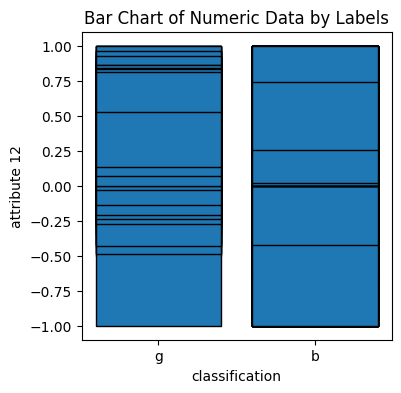

-----------------------------------------------------
ATTRIBUTE 13 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 26, Percentage: %7.41
Range: [-0.79657 - -0.59657], Count: 15, Percentage: %4.27
Range: [-0.57576 - -0.37576000000000004], Count: 10, Percentage: %2.85
Range: [-0.35558 - -0.15558], Count: 11, Percentage: %3.13
Range: [-0.09818 - 0.10182000000000001], Count: 51, Percentage: %14.53
Range: [0.10289 - 0.30289], Count: 21, Percentage: %5.98
Range: [0.30952 - 0.50952], Count: 21, Percentage: %5.98
Range: [0.51351 - 0.7135100000000001], Count: 35, Percentage: %9.97
Range: [0.71588 - 0.91588], Count: 58, Percentage: %16.52
Range: [0.92405 - 1.12405], Count: 103, Percentage: %29.34

Mean: 0.40080119658119656
Median: 0.64407
Mode: 1.0
Standard Deviation: 0.6212991868503486


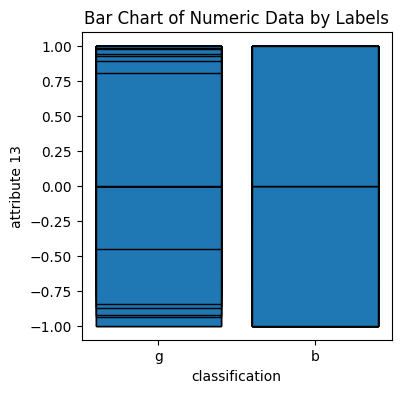

-----------------------------------------------------
ATTRIBUTE 14 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 29, Percentage: %8.26
Range: [-0.79313 - -0.5931299999999999], Count: 2, Percentage: %0.57
Range: [-0.59212 - -0.39211999999999997], Count: 14, Percentage: %3.99
Range: [-0.37965 - -0.17964999999999998], Count: 19, Percentage: %5.41
Range: [-0.16795 - 0.03205000000000002], Count: 113, Percentage: %32.19
Range: [0.03251 - 0.23251], Count: 65, Percentage: %18.52
Range: [0.24288 - 0.44288000000000005], Count: 26, Percentage: %7.41
Range: [0.44523 - 0.64523], Count: 31, Percentage: %8.83
Range: [0.66541 - 0.86541], Count: 21, Percentage: %5.98
Range: [0.87493 - 1.07493], Count: 31, Percentage: %8.83

Mean: 0.09341367521367522
Median: 0.03027
Mode: 0.0
Standard Deviation: 0.49416719123120856


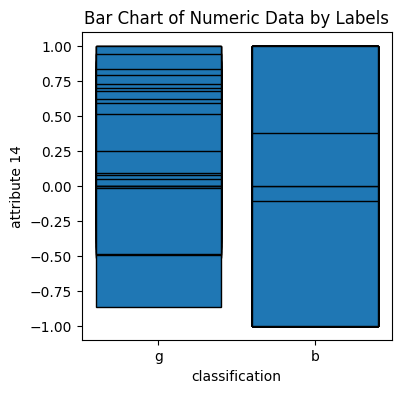

-----------------------------------------------------
ATTRIBUTE 15 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 37, Percentage: %10.54
Range: [-0.79085 - -0.5908500000000001], Count: 12, Percentage: %3.42
Range: [-0.57576 - -0.37576000000000004], Count: 11, Percentage: %3.13
Range: [-0.35737 - -0.15737], Count: 9, Percentage: %2.56
Range: [-0.1335 - 0.0665], Count: 62, Percentage: %17.66
Range: [0.08949 - 0.28949], Count: 11, Percentage: %3.13
Range: [0.29268 - 0.49268], Count: 15, Percentage: %4.27
Range: [0.50435 - 0.70435], Count: 40, Percentage: %11.4
Range: [0.70772 - 0.9077200000000001], Count: 58, Percentage: %16.52
Range: [0.90782 - 1.10782], Count: 96, Percentage: %27.35

Mean: 0.3441591452991453
Median: 0.60194
Mode: 1.0
Standard Deviation: 0.6518972147394285


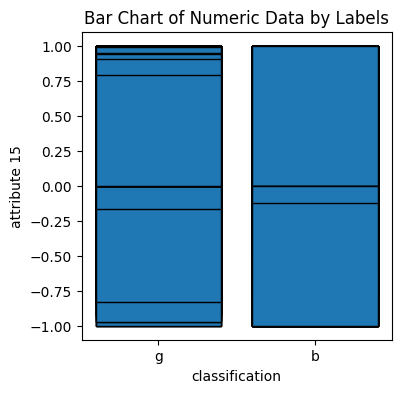

-----------------------------------------------------
ATTRIBUTE 16 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 22, Percentage: %6.27
Range: [-0.68065 - -0.48064999999999997], Count: 11, Percentage: %3.13
Range: [-0.46381 - -0.26381], Count: 18, Percentage: %5.13
Range: [-0.25527 - -0.055269999999999986], Count: 48, Percentage: %13.68
Range: [-0.0549 - 0.1451], Count: 141, Percentage: %40.17
Range: [0.14516 - 0.34516], Count: 29, Percentage: %8.26
Range: [0.34649 - 0.54649], Count: 26, Percentage: %7.41
Range: [0.54965 - 0.7496499999999999], Count: 20, Percentage: %5.7
Range: [0.77128 - 0.9712799999999999], Count: 17, Percentage: %4.84
Range: [1.0 - 1.2], Count: 19, Percentage: %5.41

Mean: 0.07113233618233618
Median: 0.0
Mode: 0.0
Standard Deviation: 0.45771725690186443


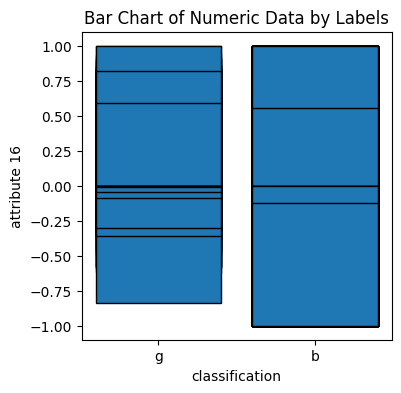

-----------------------------------------------------
ATTRIBUTE 17 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 24, Percentage: %6.84
Range: [-0.7894 - -0.5893999999999999], Count: 17, Percentage: %4.84
Range: [-0.58835 - -0.38835000000000003], Count: 10, Percentage: %2.85
Range: [-0.38391 - -0.18390999999999996], Count: 15, Percentage: %4.27
Range: [-0.17241 - 0.027590000000000003], Count: 46, Percentage: %13.11
Range: [0.047 - 0.247], Count: 16, Percentage: %4.56
Range: [0.28301 - 0.48301], Count: 24, Percentage: %6.84
Range: [0.48684 - 0.68684], Count: 43, Percentage: %12.25
Range: [0.6917 - 0.8916999999999999], Count: 58, Percentage: %16.52
Range: [0.8923 - 1.0923], Count: 98, Percentage: %27.92

Mean: 0.38194900284900285
Median: 0.59091
Mode: 1.0
Standard Deviation: 0.617139355390612


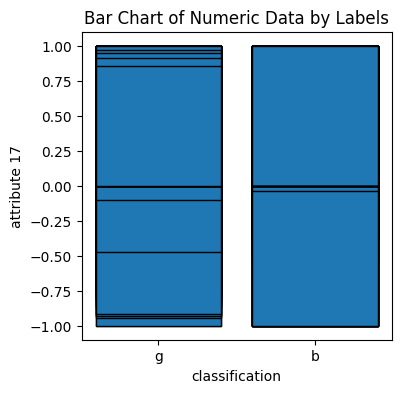

-----------------------------------------------------
ATTRIBUTE 18 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 29, Percentage: %8.26
Range: [-0.79603 - -0.5960300000000001], Count: 18, Percentage: %5.13
Range: [-0.58634 - -0.38633999999999996], Count: 15, Percentage: %4.27
Range: [-0.38606 - -0.18606], Count: 34, Percentage: %9.69
Range: [-0.18182 - 0.01818], Count: 105, Percentage: %29.91
Range: [0.01852 - 0.21852000000000002], Count: 67, Percentage: %19.09
Range: [0.235 - 0.435], Count: 21, Percentage: %5.98
Range: [0.45201 - 0.65201], Count: 18, Percentage: %5.13
Range: [0.65701 - 0.85701], Count: 21, Percentage: %5.98
Range: [0.87396 - 1.07396], Count: 23, Percentage: %6.55

Mean: -0.0036168091168091113
Median: 0.0
Mode: 0.0
Standard Deviation: 0.49605384036552447


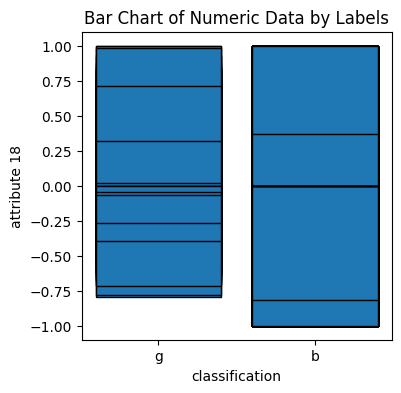

-----------------------------------------------------
ATTRIBUTE 19 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 27, Percentage: %7.69
Range: [-0.78768 - -0.58768], Count: 17, Percentage: %4.84
Range: [-0.56136 - -0.36135999999999996], Count: 13, Percentage: %3.7
Range: [-0.34773 - -0.14772999999999997], Count: 13, Percentage: %3.7
Range: [-0.12808 - 0.07192000000000001], Count: 44, Percentage: %12.54
Range: [0.0875 - 0.2875], Count: 16, Percentage: %4.56
Range: [0.29587 - 0.49587000000000003], Count: 29, Percentage: %8.26
Range: [0.5 - 0.7], Count: 48, Percentage: %13.68
Range: [0.70736 - 0.9073599999999999], Count: 60, Percentage: %17.09
Range: [0.90782 - 1.10782], Count: 84, Percentage: %23.93

Mean: 0.3593896011396011
Median: 0.57619
Mode: 1.0
Standard Deviation: 0.6253740554559709


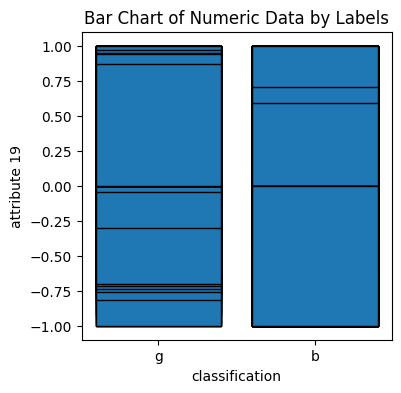

-----------------------------------------------------
ATTRIBUTE 20 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 40, Percentage: %11.4
Range: [-0.73641 - -0.53641], Count: 18, Percentage: %5.13
Range: [-0.50424 - -0.30424], Count: 22, Percentage: %6.27
Range: [-0.29052 - -0.09051999999999999], Count: 47, Percentage: %13.39
Range: [-0.08935 - 0.11065000000000001], Count: 130, Percentage: %37.04
Range: [0.11339 - 0.31339], Count: 22, Percentage: %6.27
Range: [0.31408 - 0.5140800000000001], Count: 13, Percentage: %3.7
Range: [0.5218 - 0.7218], Count: 19, Percentage: %5.41
Range: [0.7314 - 0.9314], Count: 15, Percentage: %4.27
Range: [0.95099 - 1.15099], Count: 25, Percentage: %7.12

Mean: -0.024024700854700848
Median: 0.0
Mode: 0.0
Standard Deviation: 0.5183361397646937


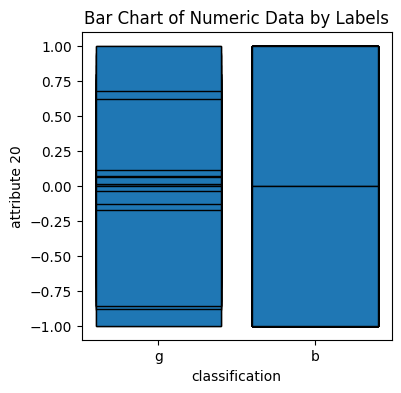

-----------------------------------------------------
ATTRIBUTE 21 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 23, Percentage: %6.55
Range: [-0.78973 - -0.5897300000000001], Count: 14, Percentage: %3.99
Range: [-0.57695 - -0.37694999999999995], Count: 16, Percentage: %4.56
Range: [-0.36591 - -0.16591], Count: 16, Percentage: %4.56
Range: [-0.14815 - 0.05185000000000001], Count: 61, Percentage: %17.38
Range: [0.05982 - 0.25982], Count: 14, Percentage: %3.99
Range: [0.26829 - 0.46829], Count: 21, Percentage: %5.98
Range: [0.47222 - 0.67222], Count: 44, Percentage: %12.54
Range: [0.67463 - 0.87463], Count: 46, Percentage: %13.11
Range: [0.87605 - 1.07605], Count: 96, Percentage: %27.35

Mean: 0.33669547008547007
Median: 0.49909
Mode: 1.0
Standard Deviation: 0.6089590017354038


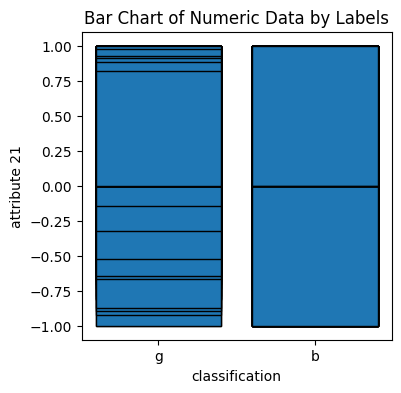

-----------------------------------------------------
ATTRIBUTE 22 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 32, Percentage: %9.12
Range: [-0.78699 - -0.5869899999999999], Count: 17, Percentage: %4.84
Range: [-0.57576 - -0.37576000000000004], Count: 18, Percentage: %5.13
Range: [-0.36364 - -0.16364], Count: 34, Percentage: %9.69
Range: [-0.16321 - 0.03679000000000002], Count: 108, Percentage: %30.77
Range: [0.03728 - 0.23728000000000002], Count: 59, Percentage: %16.81
Range: [0.24582 - 0.44582], Count: 15, Percentage: %4.27
Range: [0.44614 - 0.6461399999999999], Count: 18, Percentage: %5.13
Range: [0.65924 - 0.85924], Count: 17, Percentage: %4.84
Range: [0.89383 - 1.09383], Count: 33, Percentage: %9.4

Mean: 0.008295897435897431
Median: 0.0
Mode: 0.0
Standard Deviation: 0.5174272322961273


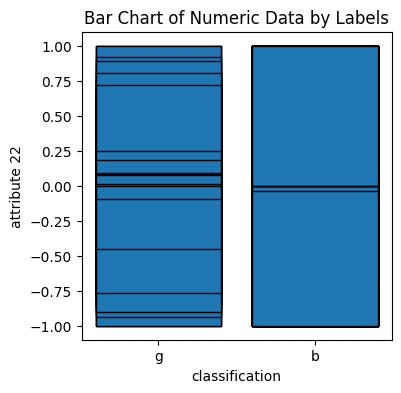

-----------------------------------------------------
ATTRIBUTE 23 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 23, Percentage: %6.55
Range: [-0.79147 - -0.5914699999999999], Count: 12, Percentage: %3.42
Range: [-0.58315 - -0.38314999999999994], Count: 13, Percentage: %3.7
Range: [-0.37835 - -0.17835], Count: 18, Percentage: %5.13
Range: [-0.16667 - 0.03333], Count: 52, Percentage: %14.81
Range: [0.05136 - 0.25136000000000003], Count: 16, Percentage: %4.56
Range: [0.25616 - 0.45616], Count: 25, Percentage: %7.12
Range: [0.46241 - 0.6624099999999999], Count: 41, Percentage: %11.68
Range: [0.66403 - 0.8640300000000001], Count: 46, Percentage: %13.11
Range: [0.86441 - 1.06441], Count: 105, Percentage: %29.91

Mean: 0.36247549857549854
Median: 0.53176
Mode: 1.0
Standard Deviation: 0.6029068085365575


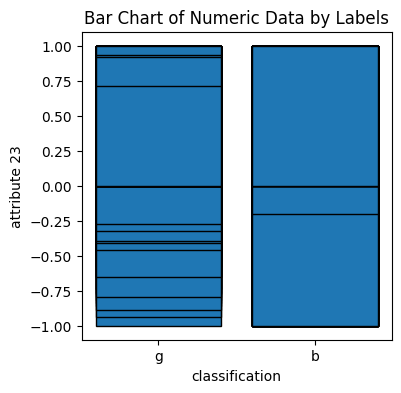

-----------------------------------------------------
ATTRIBUTE 24 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 41, Percentage: %11.68
Range: [-0.79753 - -0.5975299999999999], Count: 19, Percentage: %5.41
Range: [-0.59691 - -0.39691000000000004], Count: 22, Percentage: %6.27
Range: [-0.39458 - -0.19457999999999998], Count: 31, Percentage: %8.83
Range: [-0.19272 - 0.007280000000000009], Count: 93, Percentage: %26.5
Range: [0.00888 - 0.20888], Count: 63, Percentage: %17.95
Range: [0.21683 - 0.41683000000000003], Count: 26, Percentage: %7.41
Range: [0.4175 - 0.6174999999999999], Count: 13, Percentage: %3.7
Range: [0.62349 - 0.82349], Count: 16, Percentage: %4.56
Range: [0.82492 - 1.02492], Count: 27, Percentage: %7.69

Mean: -0.05740575498575498
Median: 0.0
Mode: 0.0
Standard Deviation: 0.5267044205027489


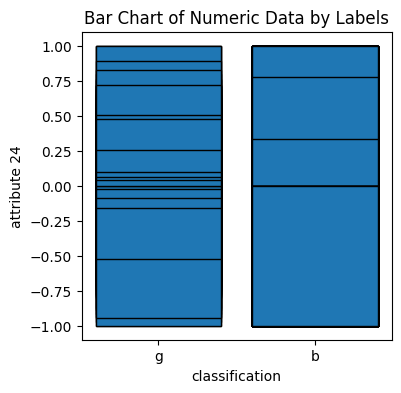

-----------------------------------------------------
ATTRIBUTE 25 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 21, Percentage: %5.98
Range: [-0.78334 - -0.58334], Count: 10, Percentage: %2.85
Range: [-0.58 - -0.37999999999999995], Count: 10, Percentage: %2.85
Range: [-0.37298 - -0.17297999999999997], Count: 10, Percentage: %2.85
Range: [-0.16489 - 0.03511], Count: 54, Percentage: %15.38
Range: [0.03513 - 0.23513], Count: 14, Percentage: %3.99
Range: [0.23693 - 0.43693000000000004], Count: 34, Percentage: %9.69
Range: [0.44483 - 0.64483], Count: 38, Percentage: %10.83
Range: [0.64628 - 0.8462799999999999], Count: 53, Percentage: %15.1
Range: [0.84906 - 1.04906], Count: 107, Percentage: %30.48

Mean: 0.39613467236467237
Median: 0.55389
Mode: 1.0
Standard Deviation: 0.577626295672421


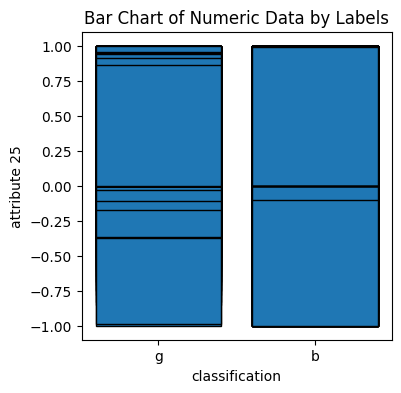

-----------------------------------------------------
ATTRIBUTE 26 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 41, Percentage: %11.68
Range: [-0.76904 - -0.56904], Count: 20, Percentage: %5.7
Range: [-0.5591 - -0.35910000000000003], Count: 24, Percentage: %6.84
Range: [-0.34838 - -0.14838], Count: 45, Percentage: %12.82
Range: [-0.14541 - 0.05459], Count: 109, Percentage: %31.05
Range: [0.05929 - 0.25929], Count: 46, Percentage: %13.11
Range: [0.26653 - 0.46653], Count: 16, Percentage: %4.56
Range: [0.5 - 0.7], Count: 18, Percentage: %5.13
Range: [0.70238 - 0.90238], Count: 12, Percentage: %3.42
Range: [0.90695 - 1.10695], Count: 20, Percentage: %5.7

Mean: -0.0711868660968661
Median: -0.01505
Mode: -1.0
Standard Deviation: 0.5077696325629779


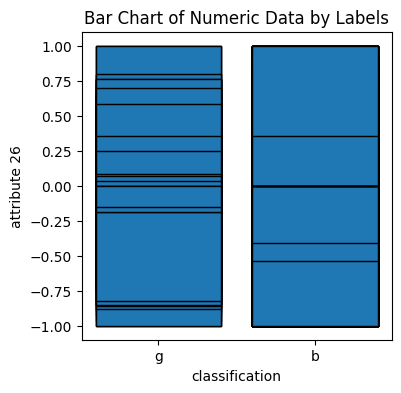

-----------------------------------------------------
ATTRIBUTE 27 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 10, Percentage: %2.85
Range: [-0.77097 - -0.57097], Count: 14, Percentage: %3.99
Range: [-0.46579 - -0.26578999999999997], Count: 6, Percentage: %1.71
Range: [-0.22839 - -0.02839], Count: 15, Percentage: %4.27
Range: [-0.02089 - 0.17911000000000002], Count: 29, Percentage: %8.26
Range: [0.18626 - 0.38626000000000005], Count: 28, Percentage: %7.98
Range: [0.39146 - 0.59146], Count: 48, Percentage: %13.68
Range: [0.59417 - 0.79417], Count: 45, Percentage: %12.82
Range: [0.79476 - 0.9947600000000001], Count: 66, Percentage: %18.8
Range: [0.99842 - 1.19842], Count: 90, Percentage: %25.64

Mean: 0.5416407977207977
Median: 0.70824
Mode: 1.0
Standard Deviation: 0.5154688066050549


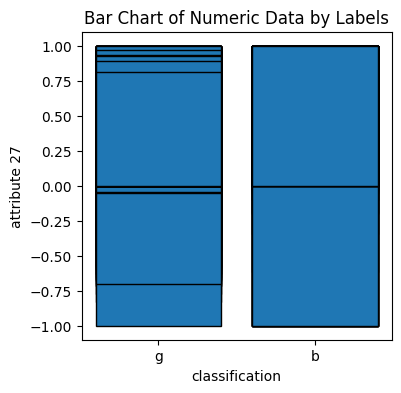

-----------------------------------------------------
ATTRIBUTE 28 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 51, Percentage: %14.53
Range: [-0.77986 - -0.57986], Count: 18, Percentage: %5.13
Range: [-0.57576 - -0.37576000000000004], Count: 23, Percentage: %6.55
Range: [-0.34586 - -0.14586], Count: 28, Percentage: %7.98
Range: [-0.14256 - 0.05744000000000002], Count: 107, Percentage: %30.48
Range: [0.06014 - 0.26014000000000004], Count: 54, Percentage: %15.38
Range: [0.26256 - 0.46256], Count: 16, Percentage: %4.56
Range: [0.482 - 0.6819999999999999], Count: 13, Percentage: %3.7
Range: [0.69129 - 0.8912899999999999], Count: 12, Percentage: %3.42
Range: [1.0 - 1.2], Count: 29, Percentage: %8.26

Mean: -0.06953760683760683
Median: -0.01769
Mode: -1.0
Standard Deviation: 0.5492411721804953


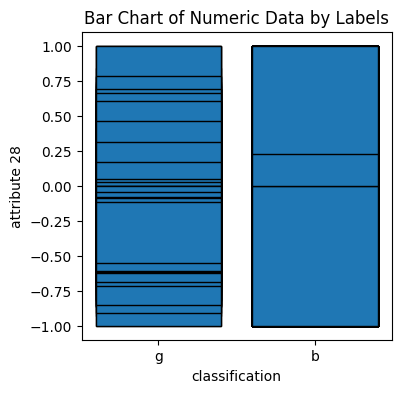

-----------------------------------------------------
ATTRIBUTE 29 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 23, Percentage: %6.55
Range: [-0.75406 - -0.55406], Count: 11, Percentage: %3.13
Range: [-0.55147 - -0.35147], Count: 7, Percentage: %1.99
Range: [-0.33169 - -0.13168999999999997], Count: 12, Percentage: %3.42
Range: [-0.12879 - 0.07121000000000002], Count: 51, Percentage: %14.53
Range: [0.07497 - 0.27497], Count: 31, Percentage: %8.83
Range: [0.27657 - 0.47657], Count: 37, Percentage: %10.54
Range: [0.48348 - 0.6834800000000001], Count: 46, Percentage: %13.11
Range: [0.7107 - 0.9107000000000001], Count: 52, Percentage: %14.81
Range: [0.91165 - 1.11165], Count: 81, Percentage: %23.08

Mean: 0.37844518518518516
Median: 0.49664
Mode: 1.0
Standard Deviation: 0.575064623722799


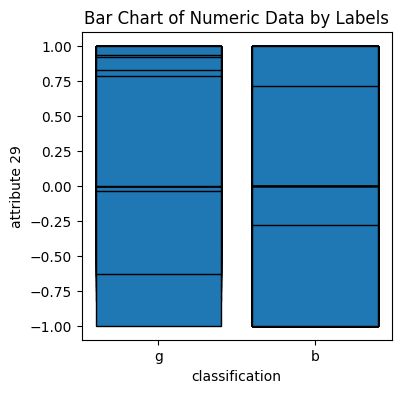

-----------------------------------------------------
ATTRIBUTE 30 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 37, Percentage: %10.54
Range: [-0.79141 - -0.59141], Count: 17, Percentage: %4.84
Range: [-0.57649 - -0.37648999999999994], Count: 17, Percentage: %4.84
Range: [-0.37088 - -0.17087999999999998], Count: 37, Percentage: %10.54
Range: [-0.16713 - 0.03287000000000001], Count: 112, Percentage: %31.91
Range: [0.03333 - 0.23333], Count: 52, Percentage: %14.81
Range: [0.2336 - 0.4336], Count: 20, Percentage: %5.7
Range: [0.45455 - 0.65455], Count: 20, Percentage: %5.7
Range: [0.65625 - 0.85625], Count: 12, Percentage: %3.42
Range: [0.86061 - 1.06061], Count: 27, Percentage: %7.69

Mean: -0.027907094017094014
Median: 0.0
Mode: 0.0
Standard Deviation: 0.5072499728746162


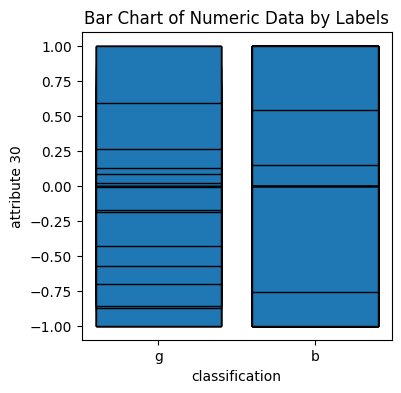

-----------------------------------------------------
ATTRIBUTE 31 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 23, Percentage: %6.55
Range: [-0.75321 - -0.55321], Count: 8, Percentage: %2.28
Range: [-0.54891 - -0.34891], Count: 9, Percentage: %2.56
Range: [-0.34717 - -0.14716999999999997], Count: 13, Percentage: %3.7
Range: [-0.1359 - 0.06410000000000002], Count: 59, Percentage: %16.81
Range: [0.06927 - 0.26927], Count: 33, Percentage: %9.4
Range: [0.27869 - 0.47869], Count: 41, Percentage: %11.68
Range: [0.48927 - 0.68927], Count: 39, Percentage: %11.11
Range: [0.69635 - 0.89635], Count: 50, Percentage: %14.25
Range: [0.90409 - 1.10409], Count: 76, Percentage: %21.65

Mean: 0.3525137321937322
Median: 0.44277
Mode: 1.0
Standard Deviation: 0.5706687124079945


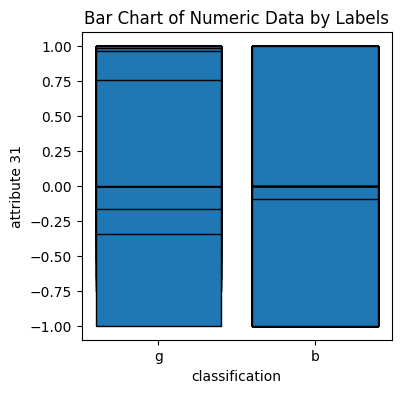

-----------------------------------------------------
ATTRIBUTE 32 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 33, Percentage: %9.4
Range: [-0.78555 - -0.58555], Count: 15, Percentage: %4.27
Range: [-0.57377 - -0.37377], Count: 17, Percentage: %4.84
Range: [-0.36765 - -0.16764999999999997], Count: 42, Percentage: %11.97
Range: [-0.15755 - 0.042450000000000015], Count: 113, Percentage: %32.19
Range: [0.05419 - 0.25419], Count: 55, Percentage: %15.67
Range: [0.25792 - 0.45792], Count: 14, Percentage: %3.99
Range: [0.47033 - 0.6703300000000001], Count: 20, Percentage: %5.7
Range: [0.70011 - 0.90011], Count: 12, Percentage: %3.42
Range: [0.90196 - 1.10196], Count: 30, Percentage: %8.55

Mean: -0.003793760683760677
Median: 0.0
Mode: 0.0
Standard Deviation: 0.512842251512933


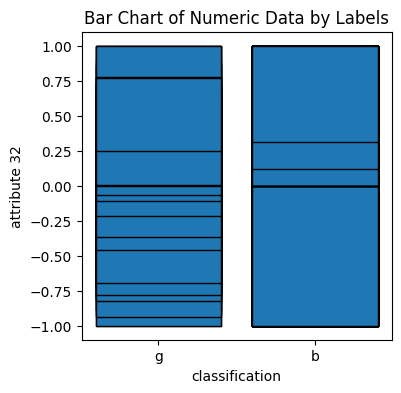

-----------------------------------------------------
ATTRIBUTE 33 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 15, Percentage: %4.27
Range: [-0.67699 - -0.47698999999999997], Count: 9, Percentage: %2.56
Range: [-0.47419 - -0.27419], Count: 10, Percentage: %2.85
Range: [-0.27339 - -0.07339000000000001], Count: 21, Percentage: %5.98
Range: [-0.06739 - 0.13261], Count: 79, Percentage: %22.51
Range: [0.13376 - 0.33376], Count: 28, Percentage: %7.98
Range: [0.33381 - 0.53381], Count: 41, Percentage: %11.68
Range: [0.54252 - 0.7425200000000001], Count: 42, Percentage: %11.97
Range: [0.74323 - 0.94323], Count: 46, Percentage: %13.11
Range: [0.95838 - 1.15838], Count: 60, Percentage: %17.09

Mean: 0.3493636467236467
Median: 0.40956
Mode: 0.0
Standard Deviation: 0.5219183070511462


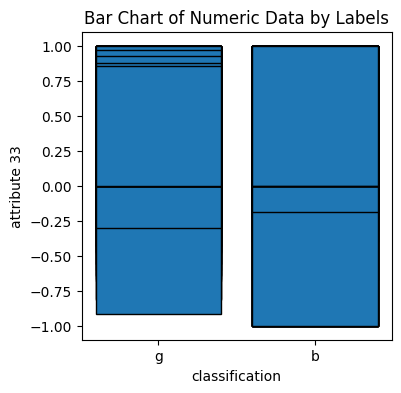

-----------------------------------------------------
ATTRIBUTE 34 Analysis (Count Ranges):
-----------------------------------------------------
Range: [-1.0 - -0.8], Count: 23, Percentage: %6.55
Range: [-0.76112 - -0.5611200000000001], Count: 17, Percentage: %4.84
Range: [-0.55837 - -0.35837], Count: 20, Percentage: %5.7
Range: [-0.35339 - -0.15338999999999997], Count: 30, Percentage: %8.55
Range: [-0.15143 - 0.04857], Count: 140, Percentage: %39.89
Range: [0.05394 - 0.25394], Count: 42, Percentage: %11.97
Range: [0.26092 - 0.46092], Count: 24, Percentage: %6.84
Range: [0.46301 - 0.66301], Count: 15, Percentage: %4.27
Range: [0.67739 - 0.8773900000000001], Count: 14, Percentage: %3.99
Range: [0.90196 - 1.10196], Count: 26, Percentage: %7.41

Mean: 0.014480113960113956
Median: 0.0
Mode: 0.0
Standard Deviation: 0.4676696002265439


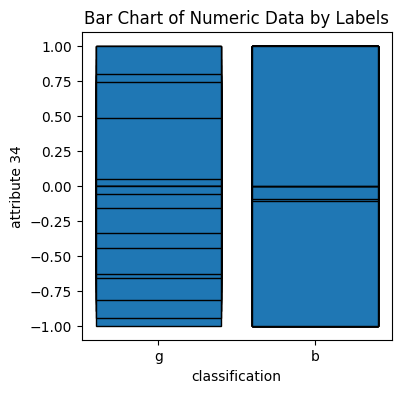

In [5]:
filename = "data/ionosphere.data"
ionosphere_dataKNN = readFileKNN(filename)

categories = []
for i in range(34):
    name = "attribute " + str(i+1)
    categories.append(name)
classifications = ["g", "b"]

ionosphereAnalysis = dataAnalysis(ionosphere_dataKNN,categories,classifications)
ionosphereAnalysis.printLabelStats()
ionosphereAnalysis.printCategoryStats()

### Dataset 2 (Adult Data Set):

In [ ]:
filename = "data/adult.data"
shortfilename = "data/Short_adult.data"
adult_dataKNN = readFileKNN(filename)
short_adult_dataKNN = readFileKNN(shortfilename)

categories = ['age', 'workclass', 'fnlwgt', 'education','education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', "native-country"]
classifications = [">50K", "<=50K"]

adultAnalysis = dataAnalysis(adult_dataKNN,categories,classifications)
adultAnalysis.printLabelStats()
adultAnalysis.printCategoryStats()

### Dataset 3 (Rice):

Classification Analysis:
Total: 3810 (%100)
Value: Cammeo, Count: 1630, Percentage: %42.78
Value: Osmancik, Count: 2180, Percentage: %57.22
Attribute Analysis:
-----------------------------------------------------
AREA Analysis (Count Ranges):
-----------------------------------------------------
Range: [7551.0 - 8687.2], Count: 12, Percentage: %0.31
Range: [8702.0 - 9838.2], Count: 104, Percentage: %2.73
Range: [9842.0 - 10978.2], Count: 531, Percentage: %13.94
Range: [10979.0 - 12115.2], Count: 985, Percentage: %25.85
Range: [12120.0 - 13256.2], Count: 839, Percentage: %22.02
Range: [13258.0 - 14394.2], Count: 603, Percentage: %15.83
Range: [14398.0 - 15534.2], Count: 508, Percentage: %13.33
Range: [15540.0 - 16676.2], Count: 187, Percentage: %4.91
Range: [16678.0 - 17814.2], Count: 37, Percentage: %0.97
Range: [17856.0 - 18992.2], Count: 4, Percentage: %0.1

Mean: 12667.727559055118
Median: 12421.5
Mode: 11422.0
Standard Deviation: 1732.1403463112447


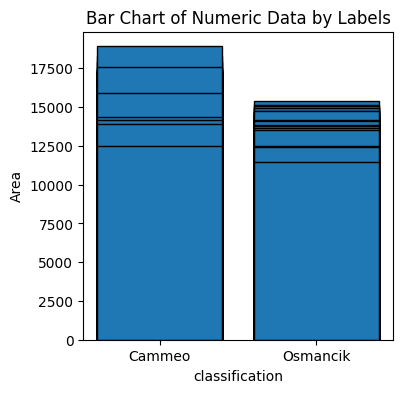

-----------------------------------------------------
PERIMETER Analysis (Count Ranges):
-----------------------------------------------------
Range: [359.1000061035156 - 378.03460388183595], Count: 15, Percentage: %0.39
Range: [378.7909851074219 - 397.7255828857422], Count: 103, Percentage: %2.7
Range: [397.7860107421875 - 416.7206085205078], Count: 454, Percentage: %11.92
Range: [416.75299072265625 - 435.6875885009766], Count: 824, Percentage: %21.63
Range: [435.70599365234375 - 454.6405914306641], Count: 682, Percentage: %17.9
Range: [454.6780090332031 - 473.61260681152345], Count: 489, Percentage: %12.83
Range: [473.72198486328125 - 492.6565826416016], Count: 557, Percentage: %14.62
Range: [492.6629943847656 - 511.59759216308595], Count: 461, Percentage: %12.1
Range: [511.6000061035156 - 530.5346038818359], Count: 192, Percentage: %5.04
Range: [531.0009765625 - 549.9355743408203], Count: 33, Percentage: %0.87

Mean: 454.2391801488681
Median: 448.8524932861328
Mode: 432.298004150390

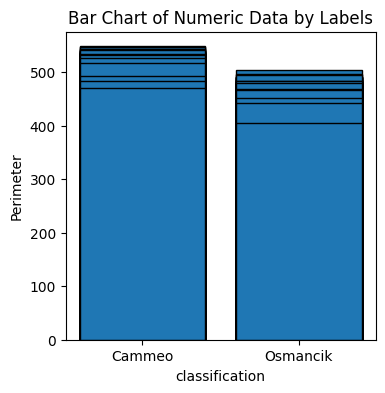

-----------------------------------------------------
MAJOR_AXIS_LENGTH Analysis (Count Ranges):
-----------------------------------------------------
Range: [145.26446533203125 - 154.63906860351562], Count: 15, Percentage: %0.39
Range: [154.88632202148438 - 164.26092529296875], Count: 178, Percentage: %4.67
Range: [164.287841796875 - 173.66244506835938], Count: 697, Percentage: %18.29
Range: [173.6658172607422 - 183.04042053222656], Count: 841, Percentage: %22.07
Range: [183.05059814453125 - 192.42520141601562], Count: 499, Percentage: %13.1
Range: [192.45367431640625 - 201.82827758789062], Count: 521, Percentage: %13.67
Range: [201.83914184570312 - 211.2137451171875], Count: 578, Percentage: %15.17
Range: [211.23309326171875 - 220.60769653320312], Count: 367, Percentage: %9.63
Range: [220.6954803466797 - 230.07008361816406], Count: 100, Percentage: %2.62
Range: [230.12933349609375 - 239.50393676757812], Count: 14, Percentage: %0.37

Mean: 188.77622197669322
Median: 185.81005859375
Mo

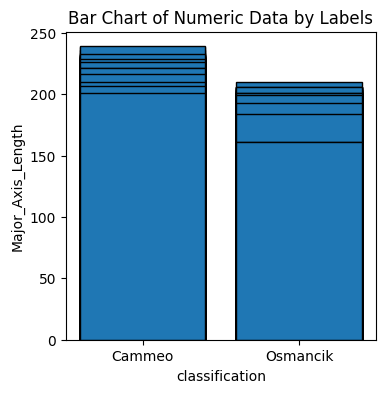

-----------------------------------------------------
MINOR_AXIS_LENGTH Analysis (Count Ranges):
-----------------------------------------------------
Range: [59.532405853271484 - 64.33341026306152], Count: 3, Percentage: %0.08
Range: [64.8710708618164 - 69.67207527160645], Count: 11, Percentage: %0.29
Range: [69.73334503173828 - 74.53434944152832], Count: 81, Percentage: %2.13
Range: [74.55428314208984 - 79.35528755187988], Count: 315, Percentage: %8.27
Range: [79.37977600097656 - 84.1807804107666], Count: 896, Percentage: %23.52
Range: [84.19003295898438 - 88.99103736877441], Count: 1309, Percentage: %34.36
Range: [88.99236297607422 - 93.79336738586426], Count: 870, Percentage: %22.83
Range: [93.79976654052734 - 98.60077095031738], Count: 260, Percentage: %6.82
Range: [98.61820220947266 - 103.4192066192627], Count: 58, Percentage: %1.52
Range: [103.80493927001953 - 108.60594367980957], Count: 7, Percentage: %0.18

Mean: 86.31375037165765
Median: 86.43464660644531
Mode: 86.27912139892

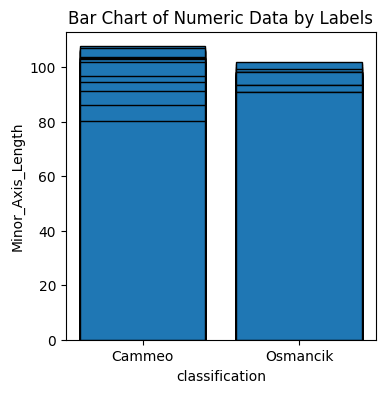

-----------------------------------------------------
ECCENTRICITY Analysis (Count Ranges):
-----------------------------------------------------
Range: [0.7772325873374939 - 0.7943100214004517], Count: 1, Percentage: %0.03
Range: [0.7995114326477051 - 0.8165888667106629], Count: 6, Percentage: %0.16
Range: [0.8170177936553955 - 0.8340952277183533], Count: 29, Percentage: %0.76
Range: [0.8344793319702148 - 0.8515567660331727], Count: 160, Percentage: %4.2
Range: [0.8515778183937073 - 0.8686552524566651], Count: 578, Percentage: %15.17
Range: [0.8686573505401611 - 0.8857347846031189], Count: 930, Percentage: %24.41
Range: [0.8857367038726807 - 0.9028141379356385], Count: 1165, Percentage: %30.58
Range: [0.902815580368042 - 0.9198930144309998], Count: 822, Percentage: %21.57
Range: [0.9199061989784241 - 0.9369836330413819], Count: 117, Percentage: %3.07
Range: [0.9450585842132568 - 0.9621360182762146], Count: 2, Percentage: %0.05

Mean: 0.886870506742182
Median: 0.8890500962734222
Mode: 

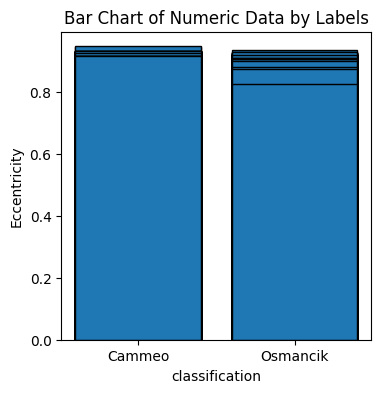

-----------------------------------------------------
CONVEX_AREA Analysis (Count Ranges):
-----------------------------------------------------
Range: [7723.0 - 8860.6], Count: 10, Percentage: %0.26
Range: [8866.0 - 10003.6], Count: 96, Percentage: %2.52
Range: [10012.0 - 11149.6], Count: 490, Percentage: %12.86
Range: [11151.0 - 12288.6], Count: 953, Percentage: %25.01
Range: [12290.0 - 13427.6], Count: 851, Percentage: %22.34
Range: [13428.0 - 14565.6], Count: 588, Percentage: %15.43
Range: [14567.0 - 15704.6], Count: 545, Percentage: %14.3
Range: [15709.0 - 16846.6], Count: 213, Percentage: %5.59
Range: [16852.0 - 17989.6], Count: 60, Percentage: %1.57
Range: [18062.0 - 19199.6], Count: 4, Percentage: %0.1

Mean: 12952.496850393702
Median: 12706.5
Mode: 11132.0
Standard Deviation: 1776.738828349093


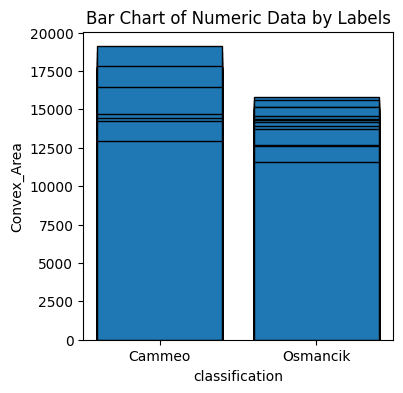

-----------------------------------------------------
EXTENT Analysis (Count Ranges):
-----------------------------------------------------
Range: [0.49741286039352417 - 0.5337765276432037], Count: 42, Percentage: %1.1
Range: [0.5342260599136353 - 0.5705897271633148], Count: 327, Percentage: %8.58
Range: [0.5707123875617981 - 0.6070760548114776], Count: 768, Percentage: %20.16
Range: [0.6071127653121948 - 0.6434764325618744], Count: 749, Percentage: %19.66
Range: [0.6435120701789856 - 0.6798757374286651], Count: 454, Percentage: %11.92
Range: [0.679901123046875 - 0.7162647902965545], Count: 404, Percentage: %10.6
Range: [0.7162907123565674 - 0.7526543796062469], Count: 374, Percentage: %9.82
Range: [0.7527186870574951 - 0.7890823543071747], Count: 440, Percentage: %11.55
Range: [0.7892237901687622 - 0.8255874574184418], Count: 244, Percentage: %6.4
Range: [0.8269609808921814 - 0.8633246481418609], Count: 8, Percentage: %0.21

Mean: 0.6619340379094202
Median: 0.6453614234924316
Mode: 0.

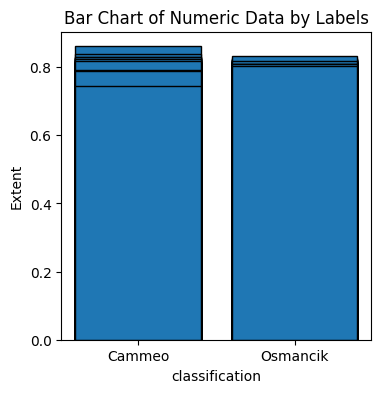

In [6]:
filename = "data/Rice_Cammeo_Osmancik.arff.txt"
shortfilename = "data/Short_Rice_Cammeo_Osmancik.arff.txt.txt"

rice_dataKNN = readFileKNN(filename)
short_rice_dataKNN = readFileKNN(shortfilename)

categories = ["Area", "Perimeter", "Major_Axis_Length", "Minor_Axis_Length", "Eccentricity", "Convex_Area", "Extent" ]
classifications = ["Cammeo", "Osmancik"]


riceAnalysis = dataAnalysis(rice_dataKNN,categories,classifications)
riceAnalysis.printLabelStats()
riceAnalysis.printCategoryStats()

### Dataset 4 (Mushroom):

Classification Analysis:
Total: 5644 (%100)
Value: p, Count: 2156, Percentage: %38.2
Value: e, Count: 3488, Percentage: %61.8
Attribute Analysis:
-----------------------------------------------------
CAP-SHAPE Analysis:
-----------------------------------------------------
Value: 2.0, Count: 300, Percentage: %5.32
Value: 3.0, Count: 4, Percentage: %0.07
Value: 6.0, Count: 2432, Percentage: %43.09
Value: 11.0, Count: 36, Percentage: %0.64
Value: 19.0, Count: 32, Percentage: %0.57
Value: 24.0, Count: 2840, Percentage: %50.32

Mean: 14.94826364280652
Median: 24.0
Mode: 24.0
Standard Deviation: 9.216093188996469


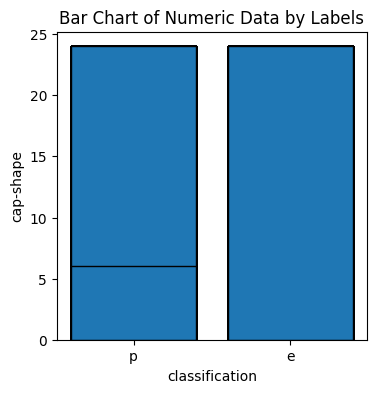

-----------------------------------------------------
CAP-SURFACE Analysis:
-----------------------------------------------------
Value: 6.0, Count: 2160, Percentage: %38.27
Value: 7.0, Count: 4, Percentage: %0.07
Value: 19.0, Count: 1260, Percentage: %22.32
Value: 25.0, Count: 2220, Percentage: %39.33

Mean: 16.37632884479093
Median: 19.0
Mode: 25.0
Standard Deviation: 8.488586967538737


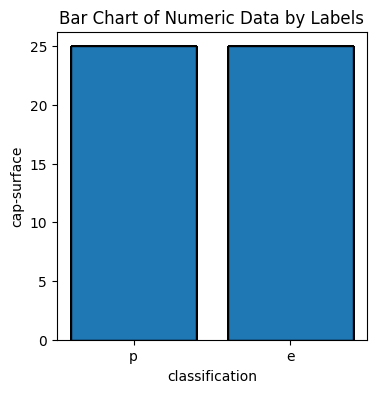

-----------------------------------------------------
CAP-COLOR Analysis:
-----------------------------------------------------
Value: 2.0, Count: 120, Percentage: %2.13
Value: 3.0, Count: 44, Percentage: %0.78
Value: 5.0, Count: 588, Percentage: %10.42
Value: 7.0, Count: 1696, Percentage: %30.05
Value: 14.0, Count: 1164, Percentage: %20.62
Value: 16.0, Count: 96, Percentage: %1.7
Value: 23.0, Count: 880, Percentage: %15.59
Value: 25.0, Count: 1056, Percentage: %18.71

Mean: 14.113394755492559
Median: 14.0
Mode: 7.0
Standard Deviation: 7.905172249316814


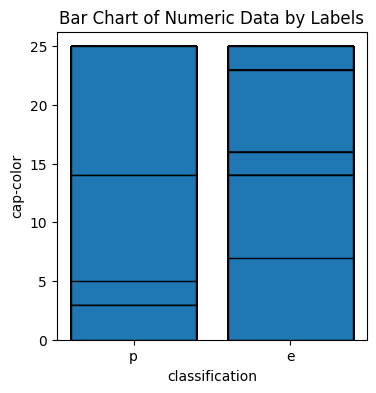

-----------------------------------------------------
BRUISES Analysis:
-----------------------------------------------------
Value: 6.0, Count: 2460, Percentage: %43.59
Value: 20.0, Count: 3184, Percentage: %56.41

Mean: 13.897944720056698
Median: 20.0
Mode: 20.0
Standard Deviation: 6.942167909214117


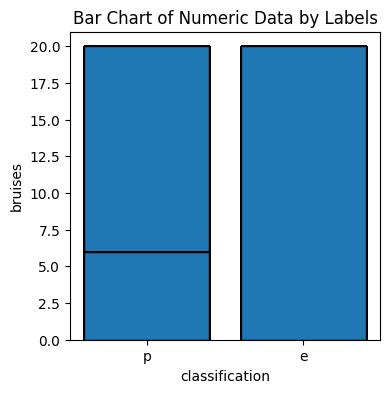

-----------------------------------------------------
ODOR Analysis:
-----------------------------------------------------
Value: 1.0, Count: 400, Percentage: %7.09
Value: 3.0, Count: 192, Percentage: %3.4
Value: 6.0, Count: 1584, Percentage: %28.07
Value: 12.0, Count: 400, Percentage: %7.09
Value: 13.0, Count: 36, Percentage: %0.64
Value: 14.0, Count: 2776, Percentage: %49.18
Value: 16.0, Count: 256, Percentage: %4.54

Mean: 10.401842664776755
Median: 14.0
Mode: 14.0
Standard Deviation: 4.6454107123910715


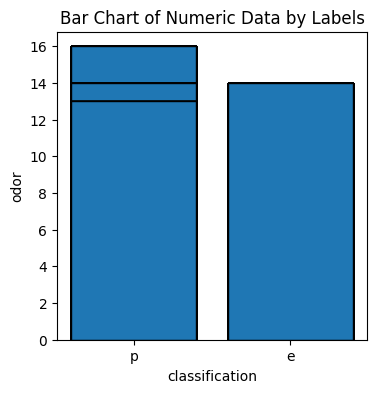

-----------------------------------------------------
GILL-ATTACHMENT Analysis:
-----------------------------------------------------
Value: 1.0, Count: 18, Percentage: %0.32
Value: 6.0, Count: 5626, Percentage: %99.68

Mean: 5.984053862508859
Median: 6.0
Mode: 6.0
Standard Deviation: 0.2819156046671038


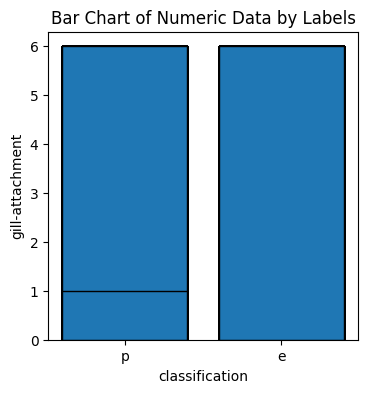

-----------------------------------------------------
GILL-SPACING Analysis:
-----------------------------------------------------
Value: 3.0, Count: 4620, Percentage: %81.86
Value: 23.0, Count: 1024, Percentage: %18.14

Mean: 6.628632175761871
Median: 3.0
Mode: 3.0
Standard Deviation: 7.7075075120471395


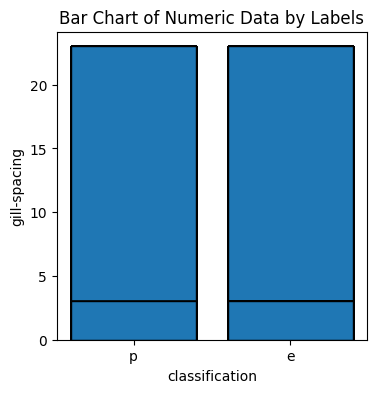

-----------------------------------------------------
GILL-SIZE Analysis:
-----------------------------------------------------
Value: 2.0, Count: 4940, Percentage: %87.53
Value: 14.0, Count: 704, Percentage: %12.47

Mean: 3.496810772501772
Median: 2.0
Mode: 2.0
Standard Deviation: 3.965007790830166


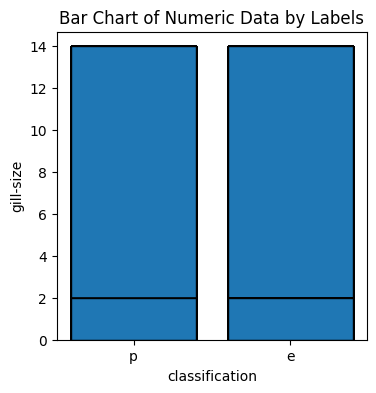

-----------------------------------------------------
GILL_COLOR Analysis:
-----------------------------------------------------
Value: 7.0, Count: 656, Percentage: %11.62
Value: 8.0, Count: 720, Percentage: %12.76
Value: 11.0, Count: 408, Percentage: %7.23
Value: 14.0, Count: 984, Percentage: %17.43
Value: 16.0, Count: 1384, Percentage: %24.52
Value: 18.0, Count: 24, Percentage: %0.43
Value: 21.0, Count: 480, Percentage: %8.5
Value: 23.0, Count: 966, Percentage: %17.12
Value: 25.0, Count: 22, Percentage: %0.39

Mean: 14.890148830616583
Median: 16.0
Mode: 16.0
Standard Deviation: 5.449528296984558


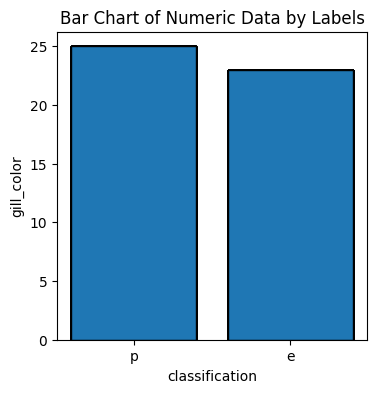

-----------------------------------------------------
STALK-SHAPE Analysis:
-----------------------------------------------------
Value: 5.0, Count: 2764, Percentage: %48.97
Value: 20.0, Count: 2880, Percentage: %51.03

Mean: 12.654145995747697
Median: 20.0
Mode: 20.0
Standard Deviation: 7.498415766813344


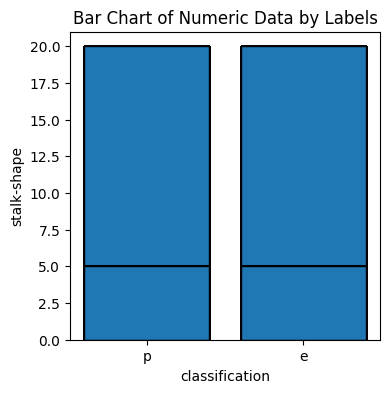

-----------------------------------------------------
STALK-ROOT Analysis:
-----------------------------------------------------
Value: 2.0, Count: 3776, Percentage: %66.9
Value: 3.0, Count: 556, Percentage: %9.85
Value: 5.0, Count: 1120, Percentage: %19.84
Value: 18.0, Count: 192, Percentage: %3.4

Mean: 3.238128986534373
Median: 2.0
Mode: 2.0
Standard Deviation: 3.010022080878114


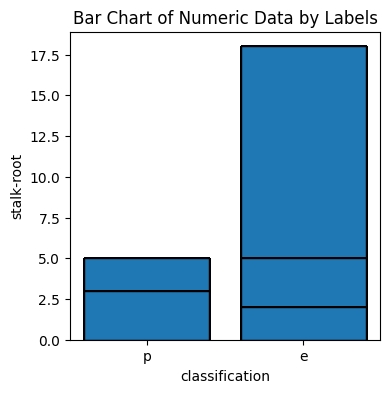

-----------------------------------------------------
STALK-SURFACE-ABOVE-RING Analysis:
-----------------------------------------------------
Value: 6.0, Count: 552, Percentage: %9.78
Value: 11.0, Count: 1332, Percentage: %23.6
Value: 19.0, Count: 3736, Percentage: %66.19
Value: 25.0, Count: 24, Percentage: %0.43

Mean: 15.866052445074414
Median: 19.0
Mode: 19.0
Standard Deviation: 4.686612862396866


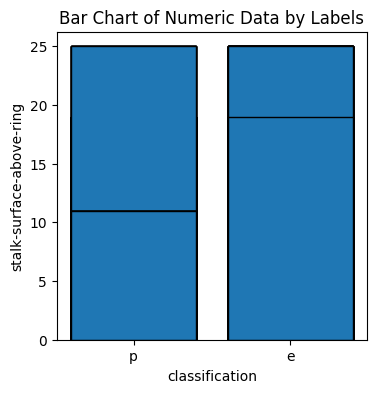

-----------------------------------------------------
STALK-SURFACE-BELOW-RING Analysis:
-----------------------------------------------------
Value: 6.0, Count: 552, Percentage: %9.78
Value: 11.0, Count: 1296, Percentage: %22.96
Value: 19.0, Count: 3544, Percentage: %62.79
Value: 25.0, Count: 252, Percentage: %4.46

Mean: 16.15946137491141
Median: 19.0
Mode: 19.0
Standard Deviation: 4.976281175517163


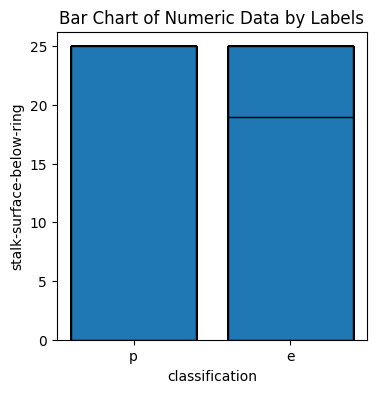

-----------------------------------------------------
STALK-COLOR-ABOVE-RING Analysis:
-----------------------------------------------------
Value: 2.0, Count: 432, Percentage: %7.65
Value: 3.0, Count: 36, Percentage: %0.64
Value: 7.0, Count: 576, Percentage: %10.21
Value: 14.0, Count: 448, Percentage: %7.94
Value: 16.0, Count: 1008, Percentage: %17.86
Value: 23.0, Count: 3136, Percentage: %55.56
Value: 25.0, Count: 8, Percentage: %0.14

Mean: 17.670446491849752
Median: 23.0
Mode: 23.0
Standard Deviation: 7.015309653780057


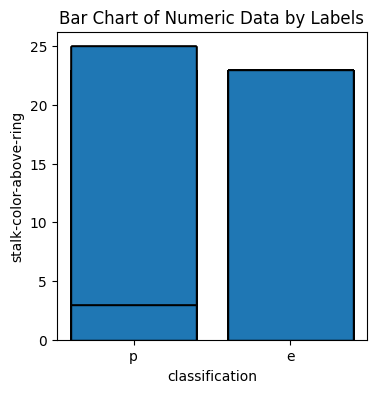

-----------------------------------------------------
STALK-COLOR-BELOW-RING Analysis:
-----------------------------------------------------
Value: 2.0, Count: 432, Percentage: %7.65
Value: 3.0, Count: 36, Percentage: %0.64
Value: 7.0, Count: 576, Percentage: %10.21
Value: 14.0, Count: 496, Percentage: %8.79
Value: 16.0, Count: 1008, Percentage: %17.86
Value: 23.0, Count: 3088, Percentage: %54.71
Value: 25.0, Count: 8, Percentage: %0.14

Mean: 17.593905031892277
Median: 23.0
Mode: 23.0
Standard Deviation: 7.005834744702012


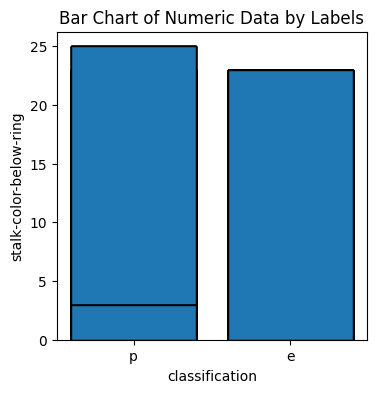

-----------------------------------------------------
VEIL-TYPE Analysis:
-----------------------------------------------------
Value: 16.0, Count: 5644, Percentage: %100.0

Mean: 16.0
Median: 16.0
Mode: 16.0
Standard Deviation: 0.0


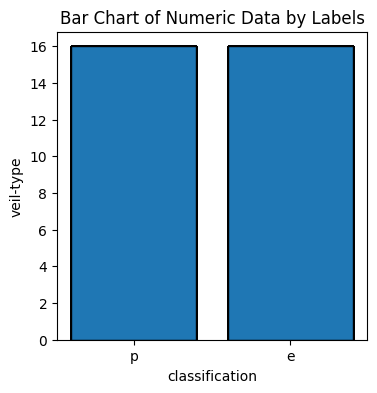

-----------------------------------------------------
VEIL-COLOR Analysis:
-----------------------------------------------------
Value: 23.0, Count: 5636, Percentage: %99.86
Value: 25.0, Count: 8, Percentage: %0.14

Mean: 23.002834868887312
Median: 23.0
Mode: 23.0
Standard Deviation: 0.07524427747689298


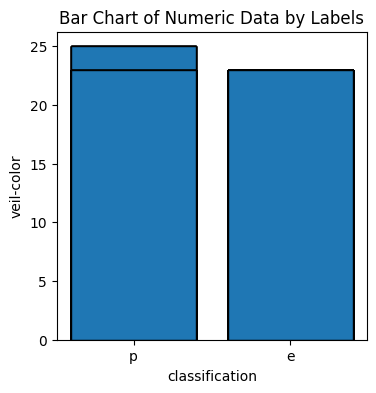

-----------------------------------------------------
RING-NUMBER Analysis:
-----------------------------------------------------
Value: 14.0, Count: 36, Percentage: %0.64
Value: 15.0, Count: 5488, Percentage: %97.24
Value: 20.0, Count: 120, Percentage: %2.13

Mean: 15.099929128277816
Median: 15.0
Mode: 15.0
Standard Deviation: 0.7265882882963774


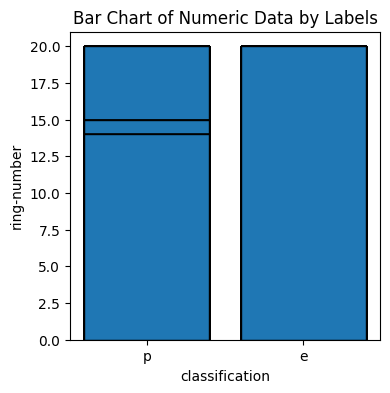

-----------------------------------------------------
RING-TYPE Analysis:
-----------------------------------------------------
Value: 5.0, Count: 824, Percentage: %14.6
Value: 12.0, Count: 1296, Percentage: %22.96
Value: 14.0, Count: 36, Percentage: %0.64
Value: 16.0, Count: 3488, Percentage: %61.8

Mean: 13.462792345854004
Median: 16.0
Mode: 16.0
Standard Deviation: 3.8636209297736035


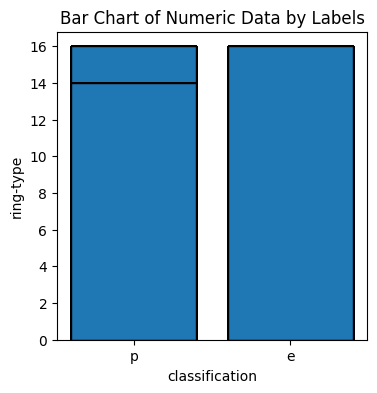

-----------------------------------------------------
SPORE-PRINT-COLOR Analysis:
-----------------------------------------------------
Value: 8.0, Count: 1584, Percentage: %28.07
Value: 11.0, Count: 1872, Percentage: %33.17
Value: 14.0, Count: 1920, Percentage: %34.02
Value: 18.0, Count: 72, Percentage: %1.28
Value: 21.0, Count: 48, Percentage: %0.85
Value: 23.0, Count: 148, Percentage: %2.62

Mean: 11.667611622962438
Median: 11.0
Mode: 14.0
Standard Deviation: 3.223882118119456


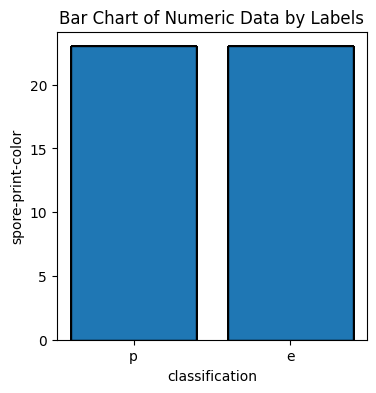

-----------------------------------------------------
POPULATION Analysis:
-----------------------------------------------------
Value: 1.0, Count: 384, Percentage: %6.8
Value: 3.0, Count: 52, Percentage: %0.92
Value: 14.0, Count: 256, Percentage: %4.54
Value: 19.0, Count: 1104, Percentage: %19.56
Value: 22.0, Count: 2160, Percentage: %38.27
Value: 25.0, Count: 1688, Percentage: %29.91

Mean: 20.343727852586817
Median: 22.0
Mode: 22.0
Standard Deviation: 6.159715263485113


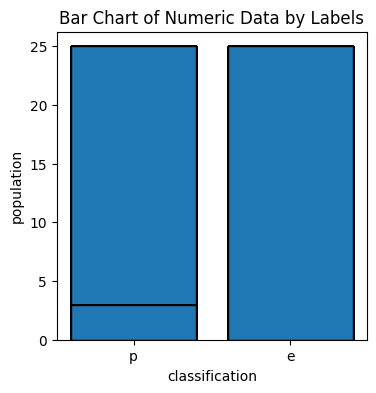

In [7]:
filename = "data/agaricus-lepiota.data"
mushroom_dataKNN = readFileKNN(filename)

shortfilename = "data/Short-agaricus-lepiota.data"
short_mushroom_dataKNN = readFileKNN(shortfilename)

categories = ["cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", 
              "gill-size", "gill_color","stalk-shape","stalk-root", "stalk-surface-above-ring", 
              "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", 
              "veil-color", "ring-number", "ring-type", "spore-print-color", "population"]

classifications = ["p", "e"] #posionous, edible

mushroomAnalysis = dataAnalysis(mushroom_dataKNN,categories,classifications)
mushroomAnalysis.printLabelStats()
mushroomAnalysis.printCategoryStats()

## Task 2: Implement the models

#### 1. Implement logistic regression, and use (full batch) gradient descent for optimization.
#### 2. Implement k-Nearest Neighbor (KNN), and find the best K.

Implement both models as Python classes. You should use the constructor for the class to initialize the model
parameters as attributes, as well as to define other important properties of the model.
• Each of your models’ classes should have (at least) two functions:
– Define a fit function, which takes the training data (i.e., x and y)—as well as other hyperparameters (e.g.,
the learning rate and/or number of gradient descent iterations)—as input. This function should train your
model by modifying the model parameters.
– Define a predict function, which takes a set of input points (i.e., x) as input and outputs predictions (i.e.,
yˆ) for these points. Note that for linear regression you need to convert probabilities to binary 0-1
predictions by thresholding the output at 0.5!
In addition to the model classes, you should also define functions evaluate_acc to evaluate the model accuracy.
This function should take the true labels (i.e., y), and target labels (i.e., yˆ) as input, and it should output the accuracy
score.
• Lastly, you should implement a script to run k-fold cross-validation

### Logistic Regression:

In [2]:
filename = "data/ionosphere.data"
#filename = "data/Rice_Cammeo_Osmancik.arff.txt"
#filename = "data/agaricus-lepiota.data"
#filename = "data/adult.data"
data, labels = readFile(filename)

# Combine features and labels
data_with_labels = list(zip(data, labels))

# Split data into training and testing sets (80% training, 20% testing)
split_ratio = 0.7
split_index = int(len(data_with_labels) * split_ratio)

train_data, train_labels = zip(*data_with_labels[:split_index])
test_data, test_labels = zip(*data_with_labels[split_index:])

model = LogisticRegression()

# Fit the model to the training data
iter = model.fit(np.array(train_data), np.array(train_labels))

# Make predictions on the test data
labels_pred = model.predict(np.array(test_data))

# Evaluate the model's accuracy
accuracy = model.evaluate_acc(np.array(test_labels), labels_pred)
print(f"Accuracy: {accuracy:.2f}")

"""
#test chosen dataset with 5-fold cross validation, print results and the average
model2 = LogisticRegression()
kfold, _ = model2.k_fold(data, labels, k = 5)
print("kfold results: ", kfold)
print("Average: ", np.average(kfold))
"""
model3 = LogisticRegression()
vals = [5,3,2,1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

for val in vals:
    model3.set_learning_rate(val)
    kfold, iterations = model3.k_fold(data, labels, k = 5)
    print("\nkfold results for learning rate", val, ": ", kfold)
    print("Average kfold results for learning rate", val, ": ", np.average(kfold))
    print("Number of iterations: ", iterations)
    print("Average number of iterations: ", np.average(iterations))

Accuracy: 0.96

kfold results for learning rate 5 :  [0.7428571428571429, 0.8142857142857143, 0.8428571428571429, 0.9, 1.0]
Average kfold results for learning rate 5 :  0.86
Number of iterations:  [90, 209, 563, 1000, 1000]
Average number of iterations:  572.4

kfold results for learning rate 3 :  [0.7428571428571429, 0.8, 0.8285714285714286, 0.9142857142857143, 0.9577464788732394]
Average kfold results for learning rate 3 :  0.8486921529175049
Number of iterations:  [264, 321, 74, 91, 127]
Average number of iterations:  175.4

kfold results for learning rate 2 :  [0.7428571428571429, 0.8, 0.8285714285714286, 0.9142857142857143, 0.9577464788732394]
Average kfold results for learning rate 2 :  0.8486921529175049
Number of iterations:  [292, 347, 14, 275, 265]
Average number of iterations:  238.6

kfold results for learning rate 1 :  [0.7571428571428571, 0.7714285714285715, 0.8142857142857143, 0.9142857142857143, 0.9577464788732394]
Average kfold results for learning rate 1 :  0.84297786

### K-Nearest Neighbor (KNN):
Riley and Torin

In [3]:
ionosphere_model = kNN(3)
adult_model = kNN(3)
rice_model = kNN(3)
mushroom_model = kNN(3)

In [ ]:
ionosphere_model.kFoldCross(ionosphere_dataKNN,3)

In [ ]:
adult_model.kFoldCross(adult_dataKNN,3)

In [ ]:
rice_model.kFoldCross(rice_dataKNN,3)

In [ ]:
mushroom_model.kFoldCross(mushroom_dataKNN,3)

## Task 3: Run Experiments

The goal of this project is to have you explore linear classification and compare different features and models. Use
5-fold cross-validation to estimate performance in all of the experiments. Evaluate the performance using accuracy.
You are welcome to perform any experiments and analyses you see fit (e.g., to compare different features), but at a
minimum, you must complete the following experiments in the order stated below:

#### 1. Compare the accuracy of k-nearest neighbor and logistic regression on the four datasets.

#### 2. Test different k values for the k-nearest neighbor to find the best k-value by showing the accuracy plot. 

#### 3. Test different learning rates for gradient descent applied to logistic regression. Use a threshold for change in the value of the cost function as termination criteria and plot the accuracy on the train/validation set as a function of iterations of gradient descent.

#### 4. Compare the accuracy of the two models as a function of the size of the dataset (by controlling the training size)

Note: The above experiments are the minimum requirements that you must complete; however, this project is open-ended. For example, you might investigate different stopping criteria for gradient descent in logistic regression and develop an automated approach to select a good subset of features. You do not need to do all of these things, but you should demonstrate creativity, rigor, and an understanding of the course material in how you run your chosen experiments and how you report on them in your write-up.

In [ ]:
bestKValue(ionosphere_model,ionosphere_dataKNN)

In [ ]:
bestKValue(adult_model,short_adult_dataKNN)

In [ ]:
bestKValue(rice_model,short_rice_dataKNN)

In [ ]:
bestKValue(mushroom_model,mushroom_dataKNN)